<a href="https://colab.research.google.com/github/A00571258/Evidencia_Machine-Learning/blob/Evidencia-2-Framework/M2_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")  
!pwd  # show current path 

Mounted at /content/gdrive
/content


In [ ]:
%cd "/content/gdrive/MyDrive/Ciencia de datos/RETO/real_estate"
!ls  # show current directory

/content/gdrive/MyDrive/Ciencia de datos/RETO/real_estate
data.csv  data.xls  Real_estate_database


In [ ]:
import pandas as pd               # For data loading
import matplotlib.pyplot as plt   # For plots 
import numpy as np                # For arrays and math
import seaborn as sns             # For easier better looking plots

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.shape

(511, 14)

In [ ]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
# Queremos observar que tanta correlación hay entre los datos 
print(pd.DataFrame(df).corr)

<bound method DataFrame.corr of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
506  0.98765   0.0  12.50     0  0.561  6.980  89.0  2.0980    3  320   
507  0.23456   0.0  12.50     0  0.561  6.980  76.0  2.6540    3  320   
508  0.44433   0.0  12.50     0  0.561  6.123  98.0  2.9870    3  320   
509  0.77763   0.0  12.70     0  0.561  6.222  34.0  2.5430    3  329   
510  0.65432   0.0  12.80     0  0.561  6.760  67.0  2.9870    3  345   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.9

<Figure size 1440x1008 with 0 Axes>

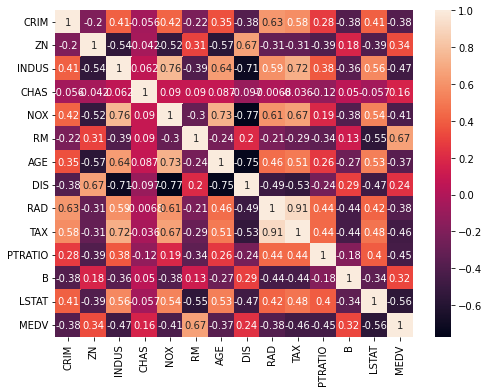

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure( figsize = (20,14) )
corr_df=df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()
plt.savefig('matriz_corr.png')

Observamos que CHAS es el único variable que tiene una correlación abajo de 0.4 (correlación moderada). Por esta razón lo eliminaríamos. 

In [ ]:
df = df.drop('CHAS',axis = 1)

In [ ]:
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Realizaremos un análisis de los datos para observar si existen datos afuera del rango establecido. 

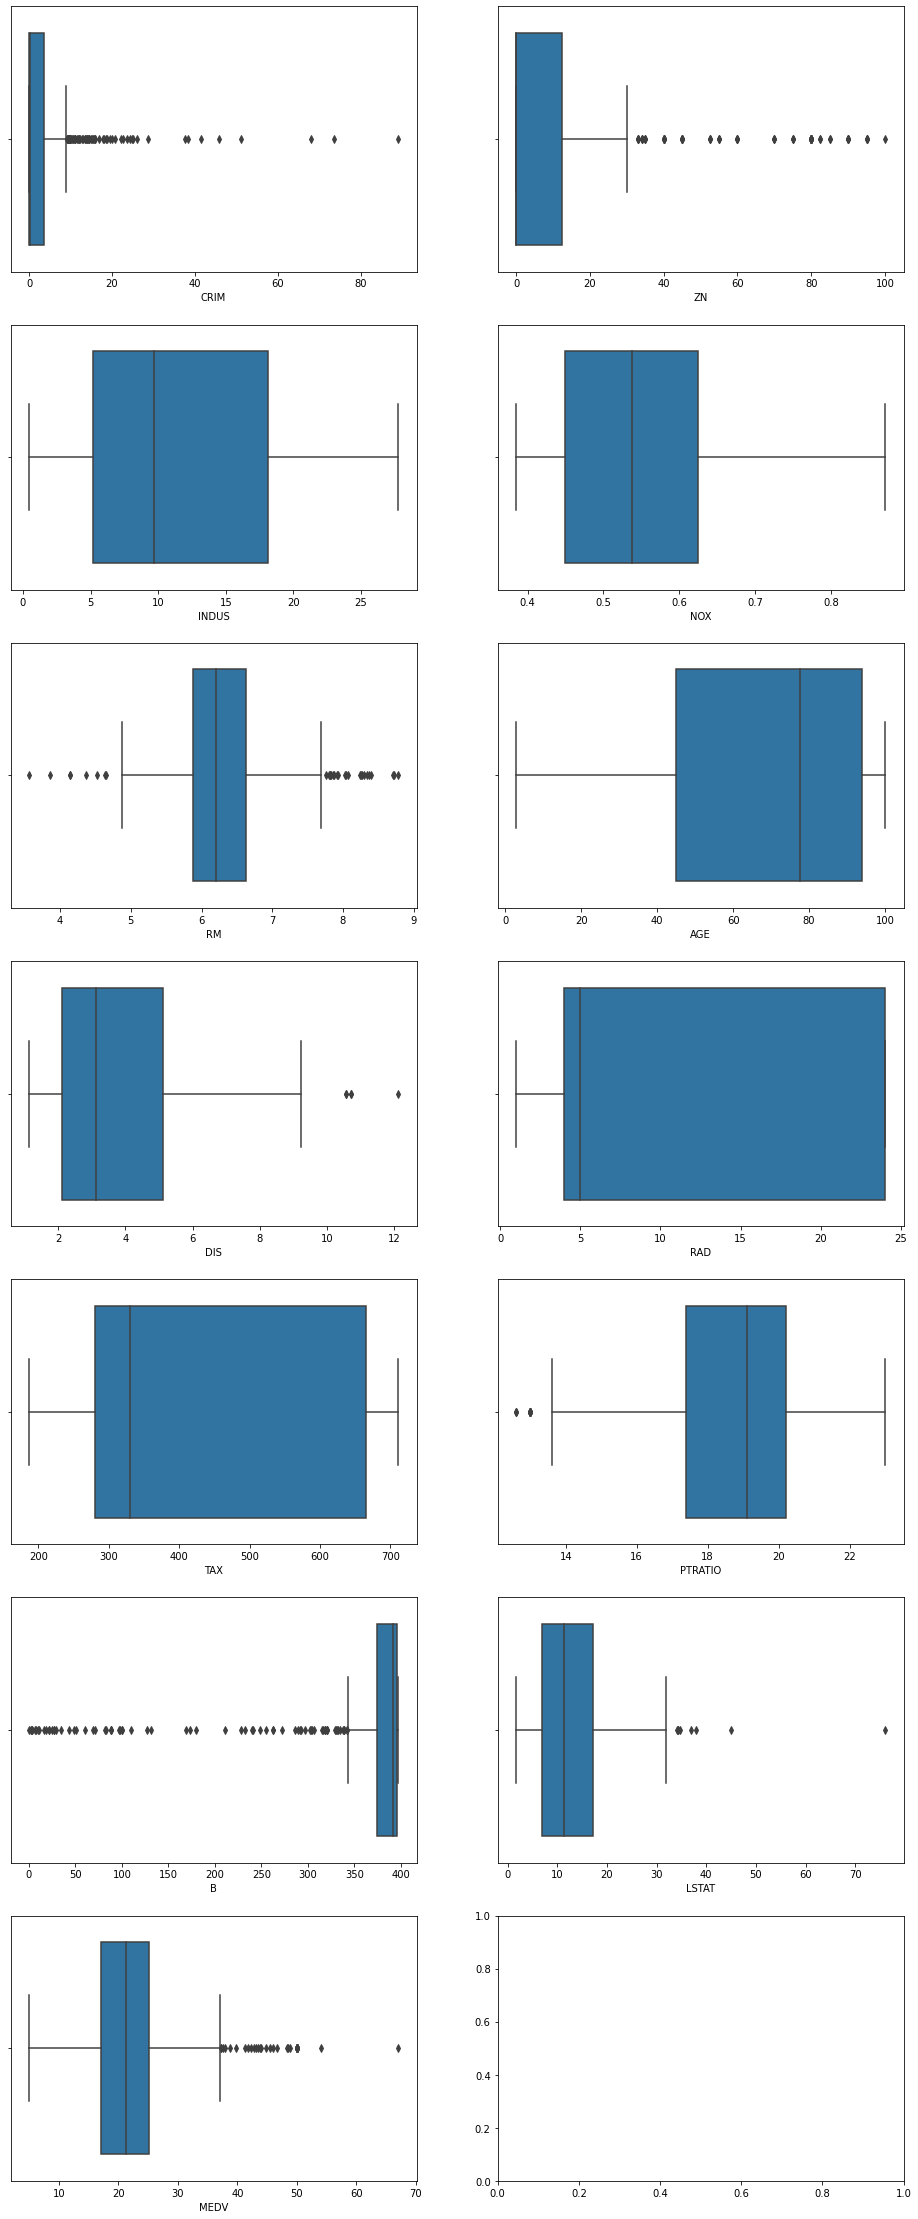

In [ ]:
# Figuras con scatter para ver si hay datos atípicos
fig, axes = plt.subplots(7,2, figsize = (16,40) )
sns.boxplot(x= 'CRIM', data = df, ax = axes[0,0])
sns.boxplot(x= 'ZN',  data = df, ax = axes[0,1])
sns.boxplot(x= 'INDUS', data = df, ax = axes[1,0])
sns.boxplot(x= 'NOX', data = df, ax = axes[1,1])
sns.boxplot(x= 'RM', data = df, ax = axes[2,0])
sns.boxplot(x= 'AGE', data = df, ax = axes[2,1])
sns.boxplot(x= 'DIS', data = df, ax = axes[3,0])
sns.boxplot(x= 'RAD', data = df, ax = axes[3,1])
sns.boxplot(x= 'TAX', data = df, ax = axes[4,0])
sns.boxplot(x= 'PTRATIO', data = df, ax = axes[4,1])
sns.boxplot(x= 'B', data = df, ax = axes[5,0])
sns.boxplot(x= 'LSTAT', data = df, ax = axes[5,1])
sns.boxplot(x= 'MEDV', data = df, ax = axes[6,0])

Tenemos que dividir nuestros datos ya filtrados en nuestras matrices de prueba y entrenamiento. 

In [ ]:
# Importamos lo necesario para el modelo de LogisticRegression de scikit learn
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
testp = 0.25
x=df[["CRIM","INDUS","NOX","AGE","RAD","DIS","LSTAT","MEDV"]]
y=df[["TAX"]]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=testp,random_state=1800)

\Ahora que ya tenemos nuestros datos selecionados podemos aplicar un modelo de regresión lineal multiple. 

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print(
  'mean_squared_error : ', mean_squared_error(y_test, y_pred))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred))

mean_squared_error :  4165.739206243737
mean_absolute_error :  42.633183446791094


In [ ]:
CoD = r2_score(y_test,y_pred)
print(CoD)

0.8514127532911563
